# Airbnb price prediction

## EDA

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_path=r"D:\jupyter_projects\ml-zoomcamp\AB_NYC_2019.csv"

In [3]:
data = pd.read_csv(data_path)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

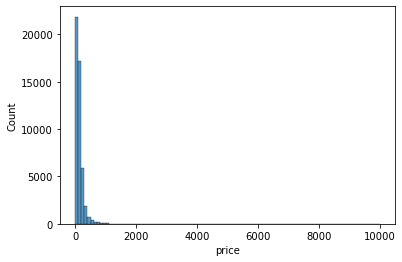

In [5]:
sns.histplot(data.price, bins=100)

<AxesSubplot:xlabel='price', ylabel='Count'>

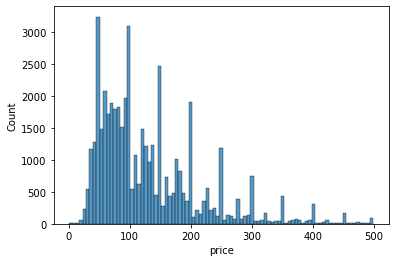

In [6]:
sns.histplot(data.price[data.price<500])

In [7]:
price_log = np.log1p(data.price)

In [8]:
price_log

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

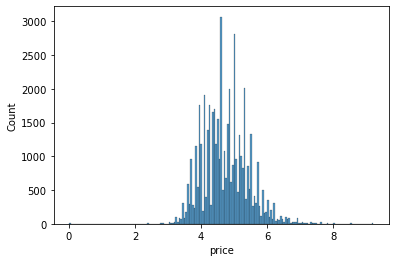

In [9]:
sns.histplot(price_log)

We can see that majority of apartments are rented out for cheaper then 200 dollars. Additionally, there are also additional hot values on the scale: around 50, 100, 200, 300, 400 and etc

In [10]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


As seen from the charts above, variable 'price' has a long tail with maximum value equal to 10.000

In [11]:
# select only needed columns
data = data[[
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]]

In [12]:
data.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048
longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718
price
[149 225 150  89  80]
674
minimum_nights
[ 1  3 10 45  2]
109
number_of_reviews
[  9  45   0 270  74]
394
reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937
calculated_host_listings_count
[6 2 1 4 3]
47
availability_365
[365 355 194   0 129]
366


In [14]:
len(data)

48895

#### missing values

In [15]:
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### validation framework

In [16]:
n = len(data)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [17]:
n_val, n_test, n_train, n

(9779, 9779, 29337, 48895)

In [18]:
idx = np.arange(n)

In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

In [21]:
df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [22]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
df_train["price"]

0         89
1         30
2        120
3        470
4        199
        ... 
29332     95
29333    101
29334    100
29335     68
29336     45
Name: price, Length: 29337, dtype: int64

In [25]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [26]:
del df_train['price']
del df_val['price']
del df_test['price']

### Linear regression

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [28]:
X_train_0 = df_train.fillna(0).values
X_train_0

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [29]:
X_train_mean = df_train.fillna(df_train.mean()).values
X_train_mean

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [32]:
w0_0, w_0 =  train_linear_regression(X_train_0, y_train)
w0_0, w_0

(-419.91266027829585,
 array([ 1.30676226e+00, -5.02167857e+00, -5.59803112e-04, -4.07634897e-04,
        -8.25470057e-03,  1.33371319e-03,  6.50203891e-04]))

In [33]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
w0_mean, w_mean

(-423.5393098430236,
 array([ 1.31148322e+00, -5.06799073e+00, -4.87741555e-04, -6.63849281e-04,
         5.34563283e-03,  1.32706019e-03,  6.38794183e-04]))

In [34]:
y_pred_0 = w0_0 + X_train_0.dot(w_0)

In [35]:
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

<AxesSubplot:ylabel='Count'>

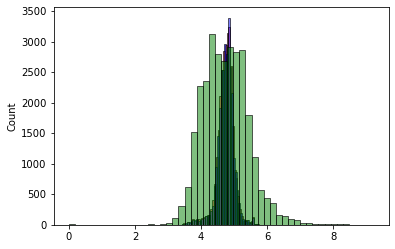

In [38]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_mean, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train, color='green', alpha=0.5, bins=50)

In [42]:
# root mean squared error
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [45]:
round(rmse(y_train, y_pred_0), 2)

0.64

In [47]:
round(rmse(y_train, y_pred_mean), 2)

0.64

the error of the model when we substitute the missing variable by 0 is the same comparing if we substitute by the mean

### validating the model

In [48]:
def prepare_X(df):
    return df.fillna(0).values

In [49]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

In [51]:
w0, w = train_linear_regression(X_train, y_train) 
w0, w

(-419.91266027829585,
 array([ 1.30676226e+00, -5.02167857e+00, -5.59803112e-04, -4.07634897e-04,
        -8.25470057e-03,  1.33371319e-03,  6.50203891e-04]))

In [52]:
y_pred_val = w0+ X_val.dot(w)

rmse(y_pred_val, y_val)

0.6430337788351761

### regularization

In [53]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

Task 4

In [58]:
rs = [0, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in rs:
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    w0, w = train_linear_regression_reg(X_train, y_train, r) 
    y_pred_val = w0 + X_val.dot(w)

    print(f"For r={r} rmse is {round(rmse(y_pred_val, y_val),2)}")

For r=0 rmse is 0.64
For r=0.0001 rmse is 0.64
For r=0.001 rmse is 0.64
For r=0.01 rmse is 0.66
For r=0.1 rmse is 0.68
For r=1 rmse is 0.68
For r=5 rmse is 0.68
For r=10 rmse is 0.68


### Q5

In [62]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train+n_val]]
    df_test = data.iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    w0, w = train_linear_regression(X_train, y_train) 
    y_pred_val = w0 + X_val.dot(w)
    
    score = rmse(y_pred_val, y_val)
    scores.append(score)
    print(f"For seed={seed} rmse is {round(score,2)}")
std = np.std(scores)
round(std, 3)

For seed=0 rmse is 0.65
For seed=1 rmse is 0.65
For seed=2 rmse is 0.65
For seed=3 rmse is 0.64
For seed=4 rmse is 0.64
For seed=5 rmse is 0.63
For seed=6 rmse is 0.63
For seed=7 rmse is 0.65
For seed=8 rmse is 0.65
For seed=9 rmse is 0.64


0.008

### Q6

In [64]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_full = data.iloc[idx[:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]
    
y_full = np.log1p(df_full.price.values)
y_test = np.log1p(df_test.price.values)
    
del df_full['price']
del df_test['price']
    
X_full = prepare_X(df_full)
X_test = prepare_X(df_test)
    
w0, w = train_linear_regression_reg(X_full, y_full, r = 0.001) 
y_pred_test = w0 + X_test.dot(w)
    
rmse(y_pred_test, y_test)

0.6452771348323509